In [1]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

In [2]:
path = 'ID_Dataset\ID_POLAND.jpg'

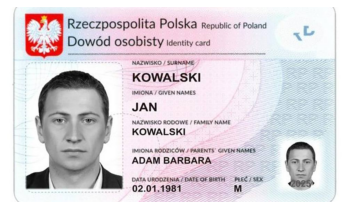

In [3]:
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

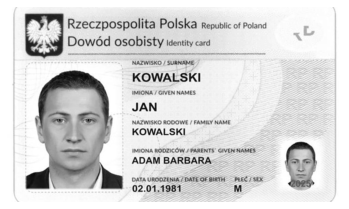

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

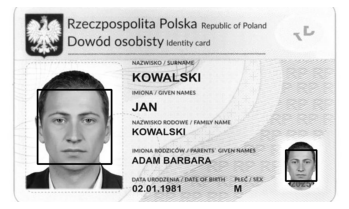

In [5]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
face = face_cascade.detectMultiScale(image, scaleFactor = 1.1, minNeighbors = 5)
for (x, y, w, h) in face:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

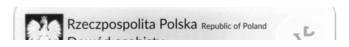

In [6]:
image = image[0:int(image.shape[1] * 0.1), 0:image.shape[1]]
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

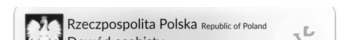

In [7]:
image = cv2.fastNlMeansDenoising(image, None, h = 10, templateWindowSize = 5, searchWindowSize = 20)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

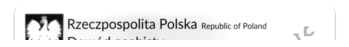

In [8]:
image = cv2.convertScaleAbs(image, alpha = 1.2, beta = -25)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

In [9]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [10]:
text = pytesseract.image_to_string(image)
text = text.lower()
text = text.split()
print(text)

['rzeczpospolita', 'polska', 'republic', 'of', 'poland', '24', '.', 'ae']


In [11]:
def verify_id(nationality, path):
    nationality = nationality.lower()
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    face = face_cascade.detectMultiScale(image, scaleFactor = 1.1, minNeighbors = 5)
    image = image[0:int(image.shape[1] * 0.1), 0:image.shape[1]]
    image = cv2.fastNlMeansDenoising(image, None, h = 10, templateWindowSize = 5, searchWindowSize = 20)
    image = cv2.convertScaleAbs(image, alpha = 1.2, beta = -25)
    pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
    text = pytesseract.image_to_string(image)
    text = text.lower()
    text = text.split()
    if len(face) > 0 and nationality in text:
        print('VERIFIED')
    else:
        print('UNVERIFIED')

In [12]:
print(f'Nationality: Poland   ID: Poland')
verify_id('Poland', 'ID_Dataset\ID_POLAND.jpg')
print()
print(f'Nationality: Austria  ID: Poland')
verify_id('Austria', 'ID_Dataset\ID_POLAND.jpg')
print()
print(f'Nationality: Austria  ID: Austria')
verify_id('Austria', 'ID_Dataset\ID_AUSTRIA.jpg')
print()
print(f'Nationality: Norway   ID: Austria')
verify_id('Norway', 'ID_Dataset\ID_AUSTRIA.jpg')
print()
print(f'Nationality: Norway   ID: Norway')
verify_id('Norway', 'ID_Dataset\ID_NORWAY.jpg')
print()
print(f'Nationality: Poland   ID: Norway')
verify_id('Poland', 'ID_Dataset\ID_NORWAY.jpg')

Nationality: Poland   ID: Poland
VERIFIED

Nationality: Austria  ID: Poland
UNVERIFIED

Nationality: Austria  ID: Austria
VERIFIED

Nationality: Norway   ID: Austria
UNVERIFIED

Nationality: Norway   ID: Norway
VERIFIED

Nationality: Poland   ID: Norway
UNVERIFIED
